In [67]:
from datasets import Dataset
import torch
import torchvision.transforms.v2 as v2
from PIL.PngImagePlugin import PngImageFile
from PIL import Image

In [2]:
dataset = Dataset.load_from_disk("data/dataset/black_white")

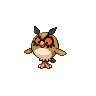

In [3]:
s: PngImageFile = dataset[30]["sprite"]
s

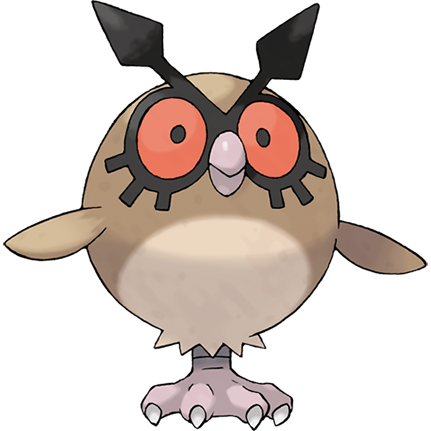

In [4]:
dataset[30]["watercolour"]

In [6]:
from numpy import s_


dataset[30]["watercolour"].size

w_sizes = set()
s_sizes = set()
palette_depth = 0

for d in dataset:
    w_sizes.add(d["watercolour"].size)
    s_sizes.add(d["sprite"].size)
    palette_depth = max(len(d["sprite"].convert("RGB").getcolors()), palette_depth)

print(
    f"{len(w_sizes)} different sizes for the watercolours"
)  # the watercolours are different sizes - we'll need to handle that
print(
    f"{s_sizes} size(s) for the sprites"
)  # the sprites are a consistent size (depending on the generation)

49 different sizes for the watercolours
{(96, 96)} size(s) for the sprites


In [107]:
img = dataset[30]["watercolour"]

H, W = 128, 128

transforms = v2.Compose(
    [
        v2.Resize((H + 20, W + 20), antialias=True),
        v2.RandomResizedCrop(size=(H, W), scale=(0.5, 1.0), antialias=True),
        v2.RandomHorizontalFlip(p=0.5),
    ]
)

background = Image.new("RGBA", (H, W), (0, 0, 0))


def remove_alpha_channel(img: PngImageFile) -> PngImageFile:
    alpha_composite = Image.alpha_composite(background, img)
    alpha_composite_3 = alpha_composite.convert("RGB")
    return alpha_composite_3


def transform_watercolour(
    img: PngImageFile,
) -> torch.Tensor:
    """Takes a PIL image, applies transforms"""
    # remove alpha channel
    transformed = transforms(img)
    no_alpha = remove_alpha_channel(transformed)
    tens = v2.functional.pil_to_tensor(no_alpha)

    tens = tens.float()
    mean, std = tens.mean(dim=(1, 2)), tens.std(dim=(1, 2))
    norm = v2.Normalize(mean=mean, std=std)(tens)
    return norm


t = transform_watercolour(img)

In [111]:
t

tensor([[[-1.0539, -1.0539, -1.0539,  ..., -1.0539, -1.0539, -1.0539],
         [-1.0539, -1.0539, -1.0539,  ..., -1.0539, -1.0539, -1.0539],
         [-1.0539, -1.0539, -1.0539,  ..., -1.0539, -1.0539, -1.0539],
         ...,
         [-1.0539, -1.0539, -1.0539,  ..., -1.0539, -1.0539, -1.0539],
         [-1.0539, -1.0539, -1.0539,  ..., -1.0539, -1.0539, -1.0539],
         [-1.0539, -1.0539, -1.0539,  ..., -1.0539, -1.0539, -1.0539]],

        [[-1.0559, -1.0559, -1.0559,  ..., -1.0559, -1.0559, -1.0559],
         [-1.0559, -1.0559, -1.0559,  ..., -1.0559, -1.0559, -1.0559],
         [-1.0559, -1.0559, -1.0559,  ..., -1.0559, -1.0559, -1.0559],
         ...,
         [-1.0559, -1.0559, -1.0559,  ..., -1.0559, -1.0559, -1.0559],
         [-1.0559, -1.0559, -1.0559,  ..., -1.0559, -1.0559, -1.0559],
         [-1.0559, -1.0559, -1.0559,  ..., -1.0559, -1.0559, -1.0559]],

        [[-1.0478, -1.0478, -1.0478,  ..., -1.0478, -1.0478, -1.0478],
         [-1.0478, -1.0478, -1.0478,  ..., -1